In [1]:
import warnings
warnings.filterwarnings('ignore')

# Bone marrow transplant

Pediatric patients with hematologic diseases after stem cell transplantation

## Table of content

1. Abstract 

2. Dataset

3. Data preprocessing

4. Correlation

5. Information Value 

6. Benchmark Model training

7. Random Forest Importance

8. Borut Algorithm 

9. Comparision Approach

10. Summary


## 1. Abstract

The aim of this project is to determine the influence of individual features on the patient's chance of survival after transplantation, using several methods and to compare their efficiency.

At the beginning, the non-machine learning method of calculating Information Value was used to determine the one-dimensional significance of the variables.

The second method used is the importance of variables provided by the random forest algorithm.

As the last method, the Boruta variable selection algorithm was used, which also ensures the ordering of variables in terms of their importance.

To measure and compare the performance of individual methods, the accuracy measures of classification models based on a full set of features (as a benchmark) and a subset of features selected by individual methods were used.

## 2. Dataset

The data set describes pediatric patients with several hematologic diseases. All patients were subject to the stem cell transplantation.

Content
The set contains 187 patients characterized by 37 features. 

__donor_age__ - Age of the donor

__donoragebelow_35__ - Is donor age less than 35 _(yes, no)_

__donor_ABO__ - ABO blood group of the donor _(0, A, B, AB)_

__donor_CMV__ - Presence of cytomegalovirus infection _(present, absent)_

__recipient_age__ - Age of the recipient

__recipientagebelow_10__ - Is recipient age below 10 _(yes, no)_

__recipientageint__ - Age of the recipient discretized to intervals _((0,5], (5, 10], (10, 20])_

__recipient_gender__ - Gender of the recipient _(female, male)_

__recipientbodymass__ - Body mass of the recipient

__recipient_ABO__ - ABO blood group of the recipient _(0, A, B ,AB)_

__recipient_rh__ - Presence of the Rh factor on recipient’s _(plus ,minus)_

__recipient_CMV__ - Presence of cytomegalovirus infection _(present, absent)

__disease__ - Type of disease _(ALL, AML, chronic, nonmalignant, lymphoma)_

__disease_group__ - Type of disease _(malignant, nonmalignant)_

__gender_match__ - Compatibility of the donor and recipient according gender _(female to male, other)_

__ABO_match__ - Compatibility of the donor and the recipient according to ABO blood group _(matched, 
mismatched)_

__CMV_status__ - Serological compatibility according to 
cytomegalovirus infection (the higher the value the lower the compatibility)

__HLA_match__ - Compatibility of antigens of the main histocompatibility complex of the donor and the recipient of hematopoietic stem cells _(10/10, 9/10, 8/10, 7/10)_

__HLA_mismatch__ - HLA matched or mismatched

__antigen__ - In how many antigens there is a difference between the donor nad the recipient _(0-3)_

__allel__ - In how many allele there is a difference between the donor nad the recipient _(0-4)_

__HLAgroup1__ - The difference type between the donor and the recipient _(HLA matched, one antigen, 
one allel, DRB1 cell, two allele or allel+antigen, two antigenes+allel, mismatched)_

__risk_group__ - Risk group _(high, low)_

__stemcellsource__ - Source of hematopoietic stem cells _(peripheral blood, bone marrow)_

__txpostrelapse__ - The second bone marrow transplantation after relapse _(yes ,no)_

__CD34x1e6per_kg__ - CD34kgx10d6 - CD34+ cell dose per kg of recipient body weight _(10^6/kg)_

__CD3x1e8per_kg__ - CD3+ cell dose per kg of recipient body weight _(10^8/kg)_

__CD3toCD34_ratio__ - CD3+ cell to CD34+ cell ratio

__ANC_recovery__ - Time to neutrophils recovery defined as neutrophils count >0.5 x 10^9/L

__PLT_recovery__ - Time to platelet recovery defined as platelet count >50000/mm3

__acuteGvHDIIIIIIV__ - Development of acute graft versus host disease stage II or III or IV _(yes, no)_

__acuteGvHDIII_IV__ - Development of acute graft versus host disease stage III or IV _(yes, no)_

__timetoacuteGvHDIII_IV__ - Time to development of acute graft versus host disease stage III or IV

__extensivechronicGvHD__ - Development of extensive chronic graft versus host disease (yes, no)


__relapse__ - Relapse of the disease _(yes, no)_

__survival_time__ - Time of observation (if alive) or time to event (if dead) in days

__survival_status__ - Survival status _(0 - alive, 1 - dead)_



### Data Import

In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff('bone-marrow.arff')

In [3]:
df = pd.DataFrame(data[0])

### Seting Target Variable

In [4]:
y = df.iloc[:,-1].str.decode('utf-8')

### Excluding Variables

Since some of the variables are related to the goal variable, and there are variables with the same characteristics. We exclude these variables

In [5]:
df = df.iloc[:,:-9]

In [6]:
df.columns

Index(['donor_age', 'donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age', 'recipient_age_below_10', 'recipient_age_int',
       'recipient_gender', 'recipient_body_mass', 'recipient_ABO',
       'recipient_rh', 'recipient_CMV', 'disease', 'disease_group',
       'gender_match', 'ABO_match', 'CMV_status', 'HLA_match', 'HLA_mismatch',
       'antigen', 'allel', 'HLA_group_1', 'risk_group', 'stem_cell_source',
       'tx_post_relapse', 'CD34_x1e6_per_kg', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio'],
      dtype='object')

In [7]:
df = df[['donor_age', 
    'donor_ABO', 
    'donor_CMV',
    'recipient_age', 
    'recipient_gender', 
    'recipient_body_mass', 
    'recipient_ABO',
    'recipient_rh', 
    'recipient_CMV', 
    'disease', 
    'gender_match', 
    'ABO_match', 
    'CMV_status', 
    'HLA_match', 
    'HLA_mismatch',
    'antigen', 
    'allel', 
    'HLA_group_1', 
    'risk_group', 
    'stem_cell_source',
    'tx_post_relapse', 
    'CD34_x1e6_per_kg', 
    'CD3_x1e8_per_kg',
    'CD3_to_CD34_ratio']]

In [8]:
str_df = df.select_dtypes([np.object])

In [9]:
str_df = str_df.stack().str.decode('utf-8').unstack()

In [10]:
num_df = df._get_numeric_data()

In [11]:
data = pd.concat([str_df, num_df], axis=1)

### Target inspection

The size of the categories in the target variable

In [12]:
y.value_counts()

0    102
1     85
Name: survival_status, dtype: int64

The counts in both categories are fairly equal, so there is no need to resampling these categories

Benchmark for built models

In [13]:
y.value_counts().max()/y.value_counts().sum()

0.5454545454545454

### Data inspection

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   donor_ABO            187 non-null    object 
 1   donor_CMV            187 non-null    object 
 2   recipient_gender     187 non-null    object 
 3   recipient_ABO        187 non-null    object 
 4   recipient_rh         187 non-null    object 
 5   recipient_CMV        187 non-null    object 
 6   disease              187 non-null    object 
 7   gender_match         187 non-null    object 
 8   ABO_match            187 non-null    object 
 9   CMV_status           187 non-null    object 
 10  HLA_match            187 non-null    object 
 11  HLA_mismatch         187 non-null    object 
 12  antigen              187 non-null    object 
 13  allel                187 non-null    object 
 14  HLA_group_1          187 non-null    object 
 15  risk_group           187 non-null    obj

## 3. Data preprocessing

### Categorical variables

In [15]:
for col_name in data.select_dtypes([np.object]).columns:
    print( data[col_name].value_counts())
    print("---------------------------------")

0     73
A     71
B     28
AB    15
Name: donor_ABO, dtype: int64
---------------------------------
absent     113
present     72
?            2
Name: donor_CMV, dtype: int64
---------------------------------
male      112
female     75
Name: recipient_gender, dtype: int64
---------------------------------
A     75
B     50
0     48
AB    13
?      1
Name: recipient_ABO, dtype: int64
---------------------------------
plus     158
minus     27
?          2
Name: recipient_rh, dtype: int64
---------------------------------
present    100
absent      73
?           14
Name: recipient_CMV, dtype: int64
---------------------------------
ALL             68
chronic         45
AML             33
nonmalignant    32
lymphoma         9
Name: disease, dtype: int64
---------------------------------
other             155
female_to_male     32
Name: gender_match, dtype: int64
---------------------------------
mismatched    134
matched        52
?               1
Name: ABO_match, dtype: int64
--------

There are several missing values, which are later replaced with the most common value.

Additionally, several variables show an ordering between categories that have been replaced with corresponding ordered numeric variables.

In [16]:
allel = []

dictionary = {"0":0,
     "1":1,
     "2":2,
     "3":3,
     "4":4,
     "?":0}

for i in data['allel']:
    allel.append(dictionary[i])

data['allel'] = allel

In [17]:
antigen = []

dictionary = {"0":0,
     "1":1,
     "2":2,
     "3":3,
     "?":0}

for i in data['antigen']:
    antigen.append(dictionary[i])

data['antigen'] = antigen

In [18]:
HLA_match = []

dictionary = {"10/10":10,
     "9/10":9,
     "8/10":8,
     "7/10":7}

for i in data['HLA_match']:
    HLA_match.append(dictionary[i])

data['HLA_match'] = HLA_match

In [19]:
CMV_status = []

dictionary = {"0":0,
     "1":1,
     "2":2,
     "3":3,
     "?" : 2}

for i in data['CMV_status']:
    CMV_status.append(dictionary[i])

data['CMV_status'] = CMV_status

In [20]:
data['donor_CMV'][data['donor_CMV']=="?"] = "absent"

In [21]:
data['recipient_ABO'][data['recipient_ABO']=="?"] = "A"

In [22]:
data['recipient_rh'][data['recipient_rh']=="?"] = "plus"

In [23]:
data['recipient_CMV'][data['recipient_CMV']=="?"] = "present"

In [24]:
data['ABO_match'][data['ABO_match']=="?"] = "mismatched"

In [25]:
multi_class = ["donor_ABO" , "recipient_ABO", "disease", "HLA_group_1"]

In [26]:
double_class = ["donor_CMV", "recipient_gender", "recipient_rh", "recipient_CMV", "gender_match", "ABO_match", "HLA_mismatch",  "risk_group", "stem_cell_source"]

### Dummie variables

Since some categorical variables have only two categories, the resulting dummy variables will be a analogous. In these cases, the significance of the variable as a whole was examined.

It is different in the case of variables with more categories where dummy variables were stored for each category.
This approach examines the significance of belonging to a category more than the categorical variable as a whole.

In [27]:
multi_class = ["donor_ABO" , "recipient_ABO", "disease", "HLA_group_1"]

In [28]:
double_class = ["donor_CMV", "recipient_gender", "recipient_rh", "recipient_CMV", "gender_match", "ABO_match", "HLA_mismatch",  "risk_group", "stem_cell_source"]

In [29]:
cat_df_multi_class = pd.get_dummies(data[multi_class])

In [30]:
cat_df_double_class = pd.get_dummies(data[double_class], drop_first =True)

In [31]:
data = pd.concat([cat_df_double_class, cat_df_multi_class, num_df], axis=1)

In [32]:
data

,donor_CMV_present,recipient_gender_male,recipient_rh_plus,recipient_CMV_present,gender_match_other,ABO_match_mismatched,HLA_mismatch_mismatched,risk_group_low,stem_cell_source_peripheral_blood,donor_ABO_0,...,HLA_group_1_one_allel,HLA_group_1_one_antigen,HLA_group_1_three_diffs,HLA_group_1_two_diffs,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio
0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,22.830137,9.6,35.0,7.20,5.38,1.338760
1,0,1,1,0,1,0,0,1,0,0,...,0,0,0,0,23.342466,4.0,20.6,4.50,0.41,11.078295
2,0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,26.394521,6.6,23.4,7.94,0.42,19.013230
3,1,0,1,0,1,1,0,1,0,0,...,0,0,0,0,39.684932,18.1,50.0,4.25,0.14,29.481647
4,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,33.358904,1.3,9.0,51.85,13.05,3.972255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,37.575342,12.9,44.0,11.08,4.39,2.522750
183,0,0,1,1,1,1,0,0,1,0,...,0,0,0,0,22.895890,13.9,44.5,4.64,4.47,1.038858
184,1,0,1,1,1,1,0,1,1,0,...,0,0,0,0,27.347945,10.4,33.0,7.73,4.73,1.635559
185,0,1,1,0,1,1,0,1,1,0,...,0,1,0,0,27.780822,8.0,24.0,15.41,1.91,8.077770


### Numeric variables

In [33]:
data.iloc[:,-6:]._get_numeric_data().describe()

,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio
count,187.000000,187.000000,185.000000,187.000000,182.000000,182.000000
mean,33.472068,9.931551,35.801081,11.891781,4.745714,5.385096
std,8.271826,5.305639,19.650922,9.914386,3.859128,9.598716
min,18.646575,0.600000,6.000000,0.790000,0.040000,0.204132
25%,27.039726,5.050000,19.000000,5.350000,1.687500,1.786683
50%,33.550685,9.600000,33.000000,9.720000,4.325000,2.734462
75%,40.117809,14.050000,50.600000,15.415000,6.785000,5.823565
max,55.553425,20.200000,103.400000,57.780000,20.020000,99.560970


### Data imputation

There are not many missing values in numerical variables, they have been replaced with the mean.

In [34]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_data = imp_mean.fit_transform(data)
imp_data = pd.DataFrame(imp_data, columns = data.columns)
data = imp_data
data

,donor_CMV_present,recipient_gender_male,recipient_rh_plus,recipient_CMV_present,gender_match_other,ABO_match_mismatched,HLA_mismatch_mismatched,risk_group_low,stem_cell_source_peripheral_blood,donor_ABO_0,...,HLA_group_1_one_allel,HLA_group_1_one_antigen,HLA_group_1_three_diffs,HLA_group_1_two_diffs,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,22.830137,9.6,35.0,7.20,5.38,1.338760
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.342466,4.0,20.6,4.50,0.41,11.078295
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,26.394521,6.6,23.4,7.94,0.42,19.013230
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,39.684932,18.1,50.0,4.25,0.14,29.481647
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,33.358904,1.3,9.0,51.85,13.05,3.972255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,37.575342,12.9,44.0,11.08,4.39,2.522750
183,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,22.895890,13.9,44.5,4.64,4.47,1.038858
184,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,27.347945,10.4,33.0,7.73,4.73,1.635559
185,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,27.780822,8.0,24.0,15.41,1.91,8.077770


## 4. Correlation

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

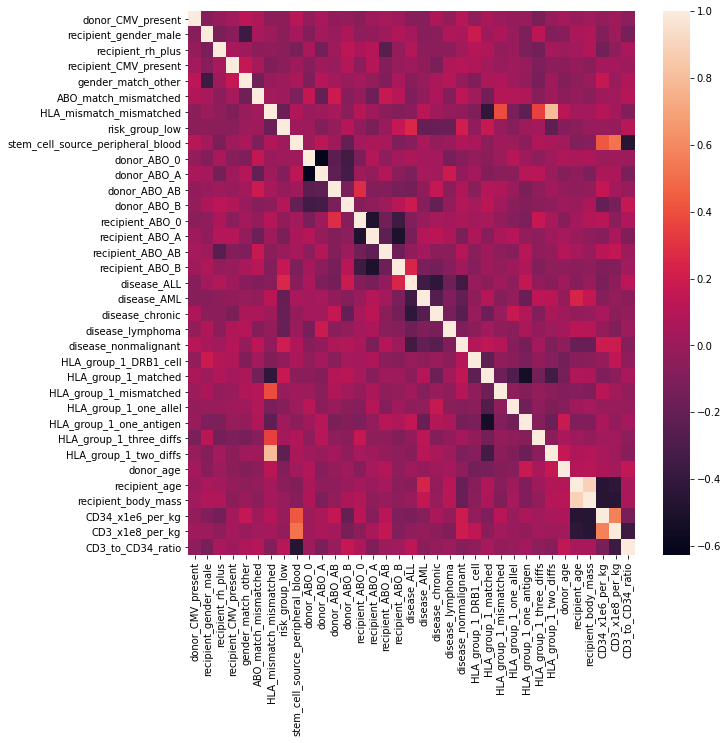

In [36]:
corr = imp_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,)
plt.show()

We can see the expected relationship between the drug dose administered, weight and age of the patient

# Variable importance 

## 5. Information value
Information value for categorical variables

In [37]:
IV = []

for i in data.columns[:-6]:
    IV_table =(pd.crosstab(data[i].astype(int),y.astype(int),
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
    IV.append(IV_table["iv"][0])
    
    print(IV_table)
    print("----------------------------------")

survival_status           0         1       woe        iv
donor_CMV_present                                        
0                  0.588235  0.647059  0.095310  0.014674
1                  0.411765  0.352941 -0.154151  0.014674
----------------------------------
survival_status               0         1       woe        iv
recipient_gender_male                                        
0                      0.411765  0.388235 -0.058841  0.002307
1                      0.588235  0.611765  0.039221  0.002307
----------------------------------
survival_status           0         1       woe      iv
recipient_rh_plus                                      
0                  0.186275  0.094118 -0.682676  0.0728
1                  0.813725  0.905882  0.107286  0.0728
----------------------------------
survival_status               0         1       woe        iv
recipient_CMV_present                                        
0                      0.421569  0.352941 -0.177681  0.019888
1    

For the remaining variables, they were categorized into two equal categories

In [38]:
for i in data.columns[-6:]:
    IV_table =(pd.crosstab(pd.cut(data[i],bins=[np.quantile(data[i],0.0)-1,
                                                np.quantile(data[i],0.5),
                                                np.quantile(data[i],1.0)]),y.astype(int),
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
    IV.append(IV_table["iv"][0])
    
    print(IV_table)
    print("----------------------------------")

survival_status          0         1       woe        iv
donor_age                                               
(17.647, 33.551]  0.558824  0.435294 -0.249812  0.061354
(33.551, 55.553]  0.441176  0.564706  0.246860  0.061354
----------------------------------
survival_status         0         1       woe        iv
recipient_age                                          
(-0.4, 9.6]      0.588235  0.411765 -0.356675  0.125885
(9.6, 20.2]      0.411765  0.588235  0.356675  0.125885
----------------------------------
survival_status             0    1       woe        iv
recipient_body_mass                                   
(5.0, 33.0]          0.598039  0.4 -0.402192  0.158979
(33.0, 103.4]        0.401961  0.6  0.400575  0.158979
----------------------------------
survival_status          0         1       woe        iv
CD34_x1e6_per_kg                                        
(-0.21, 9.72]     0.411765  0.611765  0.395896  0.162282
(9.72, 57.78]     0.588235  0.388235 -0.415515  0.16

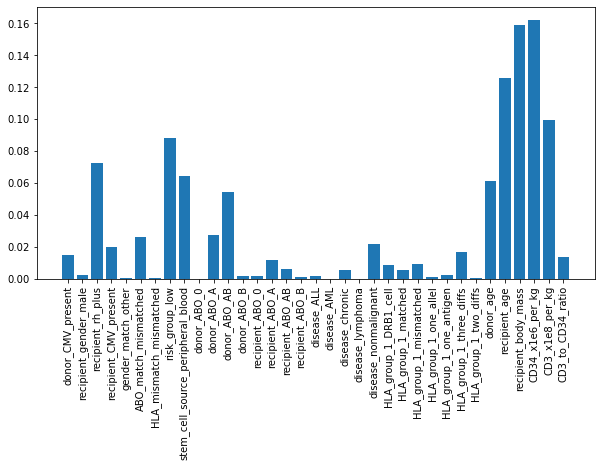

In [39]:
plt.figure(figsize=(10,5))
plt.bar(data.columns,height= IV)
plt.xticks(rotation=90)
plt.show()

In [40]:
IV =pd.Series(data=IV, index=data.columns)

In [41]:
IV_ranking = (IV*(-1)).rank()
IV_ranking

donor_CMV_present                    16.0
recipient_gender_male                24.0
recipient_rh_plus                     7.0
recipient_CMV_present                14.0
gender_match_other                   31.0
ABO_match_mismatched                 12.0
HLA_mismatch_mismatched              33.0
risk_group_low                        6.0
stem_cell_source_peripheral_blood     8.0
donor_ABO_0                          34.0
donor_ABO_A                          11.0
donor_ABO_AB                         10.0
donor_ABO_B                          26.0
recipient_ABO_0                      28.0
recipient_ABO_A                      18.0
recipient_ABO_AB                     21.0
recipient_ABO_B                      29.0
disease_ALL                          27.0
disease_AML                          35.0
disease_chronic                      23.0
disease_lymphoma                      1.0
disease_nonmalignant                 13.0
HLA_group_1_DRB1_cell                20.0
HLA_group_1_matched               

You can see the low overall value of IV.

An additional difficulty is the _disease lymphoma_ variable, which for one category takes only one value in the target variable.
It may not be informative as it is not very numerous

For this method, we can assume that about the first 10 variables have a significantly greater IV than the rest. the effectiveness of this method will be determined using a model based on these variables.

## 6. Benchmark Model training

The first step in determining the significance of variables based on the remaining algorithms is to create a random forest model.

At the same time, such a model will be used to compare the performance of individual methods

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [43]:
seed=123
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'

In [44]:
rf = RandomForestClassifier()

###  Grid Search

In [45]:
grid = GridSearchCV(rf,
                    param_grid={'max_depth'   : [3, 5, 7, None],
                                'n_estimators': [100, 300, 700],
                                'criterion'   : ["gini", "entropy"],
                                'max_features': [3,5,7,10],
                                'max_samples' : [0.40, 0.6, 1]
                               },
                    cv=kfold,
                    scoring=scoring,
                    refit=True)
grid.fit(data, y)
grid.best_params_

KeyboardInterrupt: 

In [ ]:
rf_best_acc = grid.best_score_
rf_best_acc

In [ ]:
rf_best = grid.best_estimator_

## 7. Random Forest Importance 

Determination of significance in a classic way resulting from the model of random forests

In [ ]:
rf_best.fit(data, y)

In [ ]:
importance = rf_best.feature_importances_

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data.columns, height =  importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
rf_importance =pd.Series(data=importance, index=data.columns)

rf_importance_ranking = (rf_importance*(-1)).rank()
rf_importance_ranking

In this case, there are fewer distinguishing variables.
The most significant variables coincide with those indicated by the method based on IV. 

## 8. Boruta Algorithm

In [ ]:
from boruta import BorutaPy

In [ ]:

feat_selector = BorutaPy(rf_best,verbose=2, random_state=1234)

In [ ]:
feat_selector.fit(data.values, y.values)

In [ ]:
Boruta_ranking = pd.Series(feat_selector.ranking_, index = data.columns)
Boruta_ranking

Also in this case, we see an overall low value of the significance of the variables. This algorithm selected the least variables, while the ordering showed similar properties that we observed earlier

The algorithm distinguishes only two variables as possibly significant (note that in this case it does not confirm their significance yet)

### Porównanie rankingów model

In [ ]:
Ranking = pd.DataFrame(IV_ranking, columns = ["IV"]).join(
    pd.DataFrame(rf_importance_ranking, columns = ["Random Forest"])).join(
    pd.DataFrame(Boruta_ranking, columns = ["Boruta"]))
Ranking

There are similarities in the results of all the methods, the most important variables seem to be from the group 

    1._donor_age_
    2._recipient_age_
    3._recipient_body_mass_
    4._CD34_x1e6_per_kg_
    5._CD3_x1e8_per_kg_

As we noted earlier, most of them are highly correlated with each other. And maybe only one of them is important

## 9. Comparing methods

One of the aspects of the method of selecting variables for the model is signal strength, so we will use models with a different number of variables to compare the methods.

At the same time, to test the model's ability to rank variables for importance, the values of less significant variables are also important. Therefore, for each of the methods we will use a similar and wider number of variables designated for modeling.

The following Random Forest models were used to test these properties:

**IV_10**

It contains the 10 best variables selected by the method related to IV

**RF_6**

It contains the 6 best variables selected by the method related to Rando Forest
   

**Boruta_3** 

It contains the 3 best variables selected by the method related to Boruta
   

**RF_10** 

It contains the 10 best variables selected by the method related to Rando Forest
   

**Boruta_10** 

It contains the 10 best variables selected by the method related to Boruta

Each of these models was treated separately to find their optimal performance, and in particular, for each model, the hierarchy grid was searched.

### Building models for comparison

In [ ]:
seed=123
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'

rf = RandomForestClassifier()

grid = GridSearchCV(rf,
                    param_grid={'max_depth'   : [3, 5, 7, None],
                                'n_estimators': [100, 300, 700],
                                'criterion'   : ["gini", "entropy"],
                                'max_features': [3,5,7,10],
                                'max_samples' : [0.40, 0.6, 1]
                               },
                    cv=kfold,
                    scoring=scoring,
                    refit=True)

**IV_10**

Variables used for modeling

In [ ]:
Var = Ranking["IV"][Ranking["IV"]<11].index
for i in Var:
    print(i)

In [ ]:
grid.fit(data[Var], y)
print(grid.best_params_)

IV_10_acc = grid.best_score_

IV_10 = grid.best_estimator_

print(IV_10_acc)

**RF_6**

Variables used for modeling

In [ ]:
Var = Ranking["Random Forest"][Ranking["Random Forest"]<=6].index
for i in Var:
    print(i)

In [ ]:
grid.fit(data[Var], y)
print(grid.best_params_)

RF_6_acc = grid.best_score_

RF_6 = grid.best_estimator_

print(RF_6_acc)

**Boruta_3**

Variables used for modeling

In [ ]:
Var = Ranking["Boruta"][Ranking["Boruta"]<3].index
for i in Var:
    print(i)

In [ ]:
grid.fit(data[Var], y)
print(grid.best_params_)

Boruta_3_acc = grid.best_score_

Boruta_3 = grid.best_estimator_

print(Boruta_3_acc)

**RF_10**

Variables used for modeling

In [ ]:
Var = Ranking["Random Forest"][Ranking["Random Forest"]<11].index
for i in Var:
    print(i)

In [ ]:
grid.fit(data[Var], y)
print(grid.best_params_)

RF_10_acc = grid.best_score_

RF_10 = grid.best_estimator_

print(RF_10_acc)

**Boruta_10**

Variables used for modeling

In [ ]:
Var = Ranking["Boruta"][Ranking["Boruta"]<11].index
for i in Var:
    print(i)

In [ ]:
grid.fit(data[Var], y)
print(grid.best_params_)

Boruta_10_acc = grid.best_score_

Boruta_10 = grid.best_estimator_

print(Boruta_10_acc)

### Results

In [ ]:
Results = pd.Series(
[IV_10_acc,
RF_6_acc,
Boruta_3_acc,
RF_10_acc,
Boruta_10_acc,
rf_best_acc,
0.5454545454545454],
index = ["IV_10_acc",
"RF_6_acc",
"Boruta_3_acc",
"RF_10_acc",
"Boruta_10_acc",
"All Variales",
"Proportion"])

Results

#### General observations

We can see that for all models, despite not very large values, the accuracy is greater than the proportion of a larger category.

We can also see that several models provided similar results to the model based on all variables, so we can assume that they selected all relevant variables.

#### Comparisons between approaches

**The sensitivity of the method**

We can see that a significant difference between the performances is the number of variables selected by the method.

This means that more conservative methods in the selection of variables did not discover all variables carrying information (even if they do not carry much information)

In this case, the method based on IV has the advantage because it does not show a significant difference between the more and less important variables

**Ordering of variables**

For models built for the same number of variables, we can see that Borut's algorithm is better at arranging variables.


## 10 Summary

### Approaches performance 

The model based on random forests and Borut's algorithm were too conservative in the selection of variables for modeling, however, they did better in ordering them.

### Most important Varables

The most important variables are

    1._donor_age_
    2._recipient_age_
    3._recipient_body_mass_
    4._CD34_x1e6_per_kg_
    5._CD3_x1e8_per_kg_

However, most of them are correlated, so mayby some of them are responsible for the impact on the result. Expert knowledge would be needed to decide which of them.